In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_excel("./data/Trend Input.xlsx", sheet_name=[0, 1])

In [7]:
timeline = data[0].copy()
country_breakdown = data[1].copy()

In [8]:
timeline.columns = ["Week", "Pet adoption", "Online streamer", "Staycation"]
timeline = timeline.drop([0, 1], axis=0)
timeline

,Week,Pet adoption,Online streamer,Staycation
2,2016-09-04 00:00:00,69,11,6
3,2016-09-11 00:00:00,70,10,4
4,2016-09-18 00:00:00,64,17,3
5,2016-09-25 00:00:00,64,13,3
6,2016-10-02 00:00:00,63,12,5
...,...,...,...,...
258,2021-08-01 00:00:00,52,46,42
259,2021-08-08 00:00:00,56,48,42
260,2021-08-15 00:00:00,57,48,42
261,2021-08-22 00:00:00,61,48,37


In [10]:
timeline = timeline.melt(id_vars="Week", var_name="Category", value_name="Search")
timeline

,Week,Category,Search
0,2016-09-04,Pet adoption,69
1,2016-09-11,Pet adoption,70
2,2016-09-18,Pet adoption,64
3,2016-09-25,Pet adoption,64
4,2016-10-02,Pet adoption,63
...,...,...,...
778,2021-08-01,Staycation,42
779,2021-08-08,Staycation,42
780,2021-08-15,Staycation,42
781,2021-08-22,Staycation,37


In [11]:
timeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Week      783 non-null    datetime64[ns]
 1   Category  783 non-null    object        
 2   Search    783 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 18.5+ KB


In [15]:
timeline["Search"] = timeline["Search"].astype(int)

<AxesSubplot:xlabel='Week', ylabel='Search'>

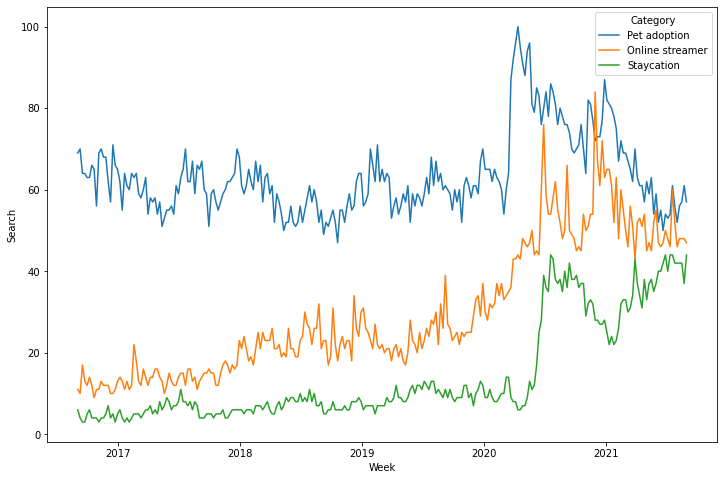

In [18]:
plt.figure(figsize=(12 ,8))
sns.lineplot(x=timeline["Week"], y=timeline["Search"], hue=timeline["Category"])

In [33]:
fig = px.line(timeline, x="Week", y="Search", color="Category", markers=False,
              width=900, height=600)
fig.show()

In [39]:
categories = timeline["Category"].unique().tolist()
traces = []
for category in categories:
    tmp = timeline[timeline["Category"] == category]
    trace = go.Scatter(x=tmp["Week"],
                       y=tmp["Search"],
                       mode="lines",
                       name=category
                       )
    traces.append(trace)
data = traces
layout = go.Layout(title="Search trend of three categories key words",
                   xaxis=dict(title="Time"),
                   yaxis=dict(title="Search amount"),
                   width=900,
                   height=600
                   )
fig = go.Figure(data, layout)
fig.show()

In [52]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, shared_yaxes=False, shared_xaxes=False)
traces = []
for category in categories:
    trace = go.Histogram(x=timeline.loc[timeline["Category"] == category, "Search"],
                         name=category, nbinsx=50)
    traces.append(trace)
fig.append_trace(traces[0], 1, 1)
fig.append_trace(traces[1], 1, 2)
fig.append_trace(traces[2], 1, 3)
fig.update_layout(title="Search amount distribution of three categories",
                  width=800, height=400)
fig.show()